In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import networkx as nx
import random
import pandas as pd
from sklearn import preprocessing
import math
import src

RAND_STATE = 42

In [2]:
# load in dataset(s)
stack_overflow_nodes = pd.read_csv('datasets/stack_overflow_tags/stack_network_nodes.csv')
stack_overflow_edges = pd.read_csv('datasets/stack_overflow_tags/stack_network_links.csv')
ny_housing = pd.read_csv('datasets/new_york_housing/NY-House-Dataset.csv')

stack_overflow_edges

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925
...,...,...,...
485,objective-c,xcode,43.418825
486,swift,xcode,48.620335
487,iphone,xcode,34.712865
488,ios,xcode,46.365091


In [3]:
ny_housing

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


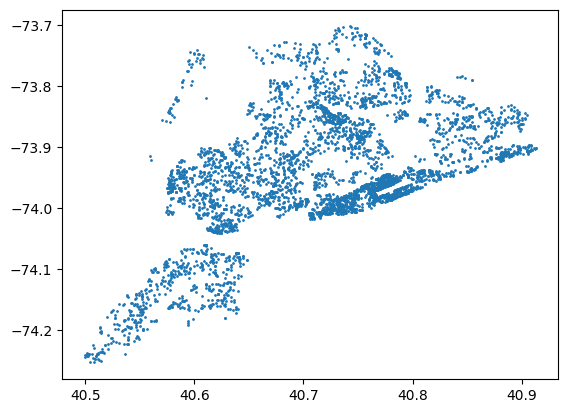

In [4]:
plt.scatter(ny_housing['LATITUDE'], ny_housing['LONGITUDE'], s = 1)
plt.show()

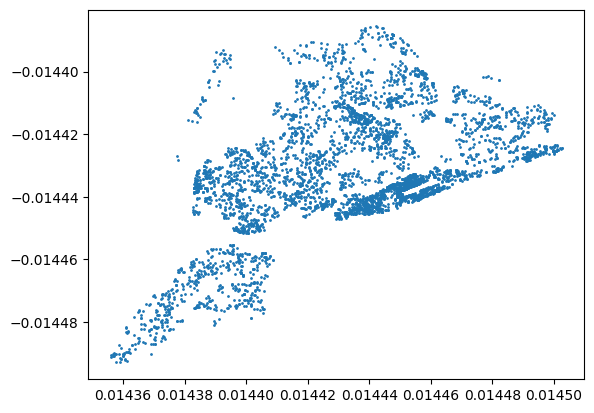

In [5]:
normalised_X = preprocessing.normalize(ny_housing[['LATITUDE', 'LONGITUDE']], axis=0, norm='l2')
plt.scatter(normalised_X[:,0], normalised_X[:,1], s = 1)
plt.show()

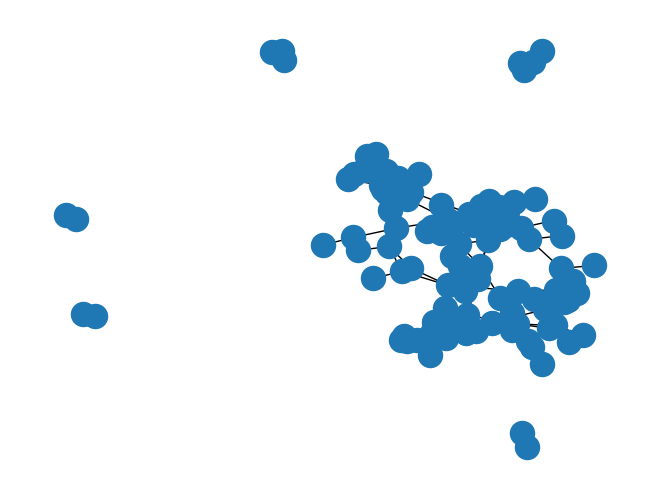

In [7]:
G = nx.from_pandas_edgelist(stack_overflow_edges, 'source', 'target', 'value')
nx.draw(G, pos=nx.spring_layout(G))

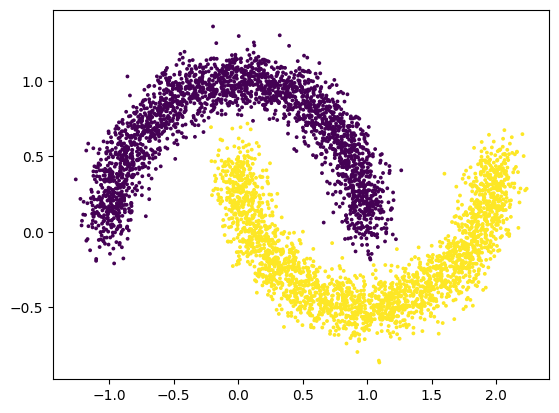

In [12]:
NUM_POINTS = 5000

X, labels = sklearn.datasets.make_moons(n_samples=NUM_POINTS, shuffle=False, noise=0.1, random_state=RAND_STATE)
x, y = X[:,0], X[:,1]
plt.scatter(x, y, c=labels, s=3)
plt.show()

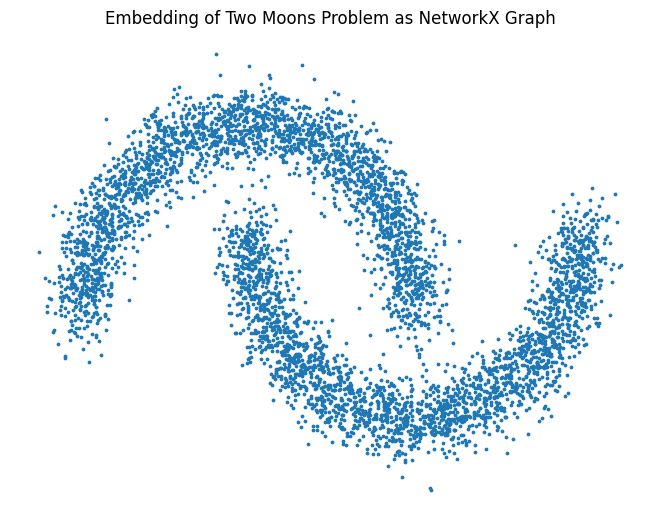

In [9]:
# take a point cloud (num_points, num_dim) and formulate a networkx Graph
def point_cloud_to_graph(points):
    G = nx.Graph()

    # take each row as the position for the point
    points = [(i, {"pos": tuple(x)}) for i, x in enumerate(points)]
    G.add_nodes_from(points)
    return G

# generate corresponding graph for the two-moons problem
G_moons = point_cloud_to_graph(X)
pos = nx.get_node_attributes(G_moons, 'pos')

nx.draw(G_moons, pos, node_size = 3)
plt.title("Embedding of Two Moons Problem as NetworkX Graph")
plt.show()

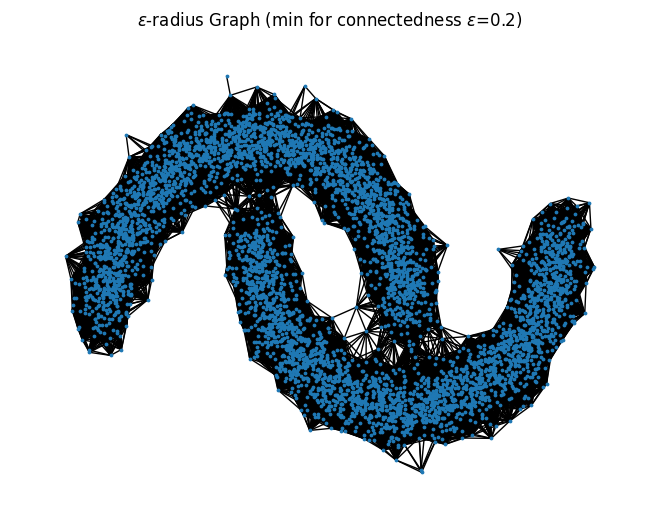

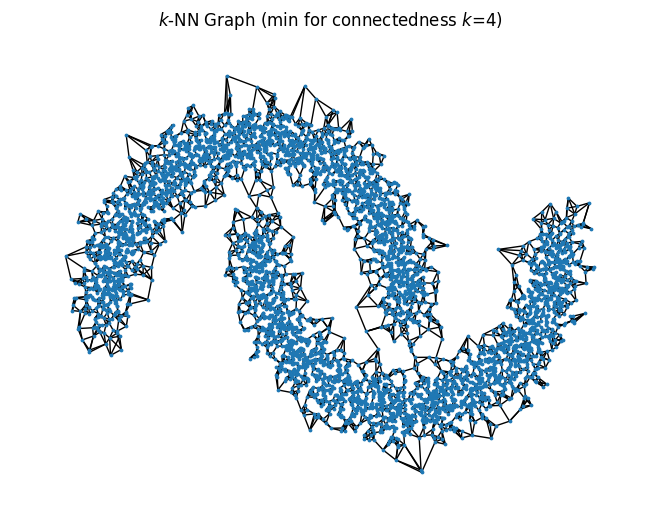

In [10]:
# TODO: add edge weighting into neighbourhood graph calculation
# TODO: add support for arbitrary node similarity calculations via parameter
# TODO: improve efficiency for minimum e/k constraint calculation - use binary search?
# TODO: add mutual knn graph?

def generate_e_radius_graph(G, x, y , e = None):
    G = nx.create_empty_copy(G)
    N = G.number_of_nodes()

    def gen_er_grph(G, e):
        edges = []
        for i1 in range(N):
            # calculate distances to other nodes
            x1, y1 = x[i1], y[i1]
            d = np.sqrt(np.square(x - x1) + np.square(y - y1))

            # nodes that satisfy radius requirement
            candidates = d <= e
            new_edges = [(i1, i) for i, v in enumerate(candidates) if i != i1 and v]
            edges.extend(new_edges)
        
        G.add_edges_from(edges)
        return G, e

    if e is not None:
        return gen_er_grph(G, e)

    e = 0
    while not nx.is_connected(G):
        e += 0.05
        G = nx.create_empty_copy(G)
        G, _ = gen_er_grph(G, e)
    return G, e

def generate_knn_graph(G, x, y , k = None):
    G = nx.create_empty_copy(G)
    N = G.number_of_nodes()

    def gen_knn_grph(G, k):
        edges = []
        for i1 in range(N):
            # calculate distances to other nodes
            x1, y1 = x[i1], y[i1]
            d = np.sqrt(np.square(x - x1) + np.square(y - y1))

            # find k closest other nodes
            idx = np.argpartition(d, k + 1)
            idx = idx[idx != i1]
            idx = idx[:k]

            # create edges to these other nodes
            new_edges = [(i1, other) for other in idx]
            edges.extend(new_edges)
 
        G.add_edges_from(edges)
        return G, k

    if k is not None:
        return gen_knn_grph(G, k)

    k = 1
    while not nx.is_connected(G):
        k += 1
        G = nx.create_empty_copy(G)
        G, _ = gen_knn_grph(G, k)
    return G, k

G_e, e = generate_e_radius_graph(G_moons, x, y)
nx.draw(G_e, pos=X, node_size = 3)
plt.title(f"$\epsilon$-radius Graph (min for connectedness $\epsilon$={e})")
plt.show()

G_k, k = generate_knn_graph(G_moons, x, y)
nx.draw(G_k, pos=X, node_size = 3)
plt.title(f"$k$-NN Graph (min for connectedness $k$={k})")
plt.show()

In [14]:
G = G_k
lap = nx.laplacian_matrix(G).todense()
eig_val, eig_vec = np.linalg.eig(lap)

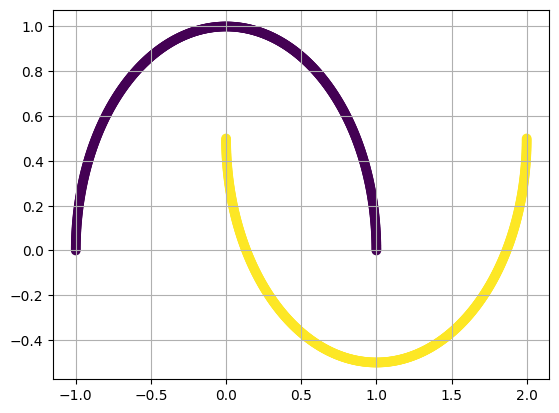

In [51]:
X, labels = sklearn.datasets.make_moons(n_samples=1000, shuffle=False, noise=0.00, random_state=RAND_STATE)
x, y = X[:,0], X[:,1]
# plt.figure(figsize=())
plt.scatter(x, y, c=labels)
plt.grid()
plt.show()

nearest_neighbors


/Users/cpatel042/Documents/Git/synoptic-project-cassimpatel/venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


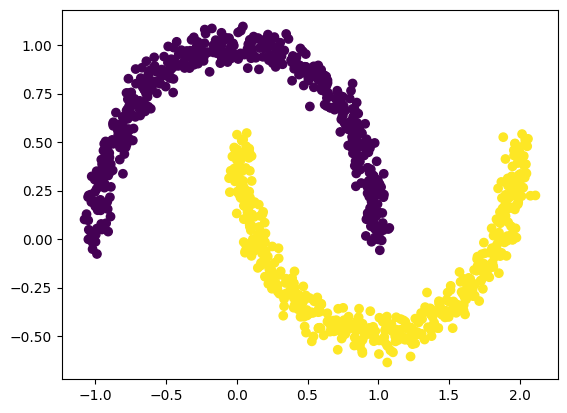

rbf


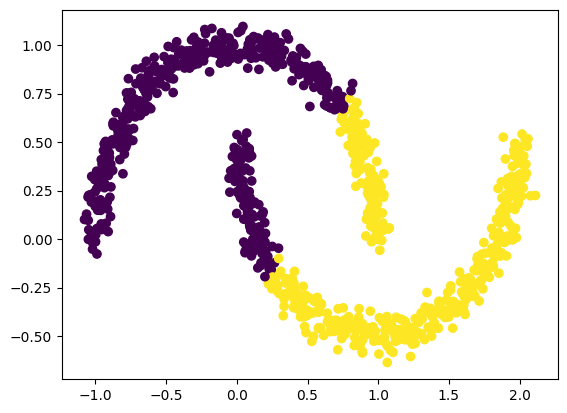

In [47]:
from sklearn.cluster import SpectralClustering

X, labels = sklearn.datasets.make_moons(n_samples=1000, shuffle=False, noise=0.05, random_state=RAND_STATE)
x, y = X[:,0], X[:,1]

for method in ['nearest_neighbors', 'rbf']:
    print(method)
    clustering = SpectralClustering(n_clusters=2, affinity=method, random_state=RAND_STATE).fit(X)
    clustering_labels = clustering.labels_
    plt.scatter(x, y, c=clustering_labels)
    plt.show()


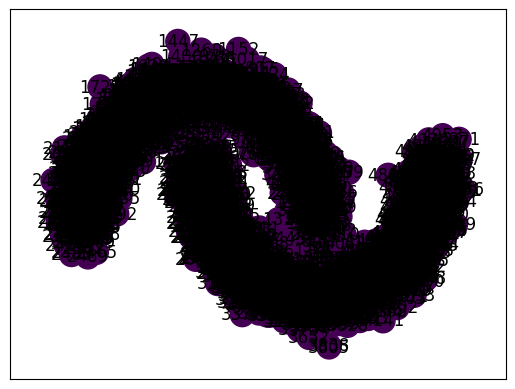

[0 0 0 ... 1 1 1]
[0 0 0 ... 0 0 0]
Accuracy: 0.5004 or 0.49960000000000004


In [18]:
eig_val = eig_val.real
eig_vec = eig_vec.real

i = np.where(eig_val<10)[0]
from sklearn.cluster import KMeans

# get rid of the complex part of Fiedler eigenvector
real_values = np.array(eig_vec[:,i[0]], dtype=np.float64).reshape(-1, 1)

# train a KMeans Clustering Model on the Fiedler eigenvector
kmeans_model = KMeans(n_clusters=2).fit(real_values)
cluster_labels = kmeans_model.labels_
nx.draw_networkx(G, pos=X, node_color=cluster_labels)
plt.show()

print(labels)
print(cluster_labels)
# # print(int(labels == cluster_labels))

# nx.draw_networkx(G, pos=X, node_color=cluster_labels == cluster_labels )
# plt.show()

acc = (labels == cluster_labels).mean()
print(f'Accuracy: {acc} or {1 - acc}')

In [ ]:
from numpy.random import randint
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Perform arbitary transformation
        X["random_int"] = randint(0, 10, X.shape[0])
        return X

(1000, 2)


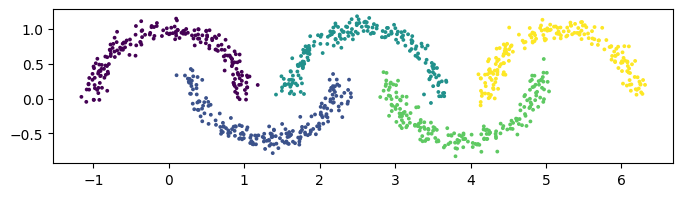

In [2]:
from src.data_generation import make_many_moons
X, y = make_many_moons(
    n_moons=5,
    sigma=0.08,  
    n_points=1000,
    y_shift = 0.4
)

print(X.shape)
plt.figure(figsize=(8, 2))
plt.scatter(X[:,0], X[:,1], c=y, s=3)
plt.show()